# Analyzing The Factors of a Top Tier Google Play App

### Goal

What makes a good game on the Play Store? In this analysis, we will explore the factors that contribute to the success of mobile apps, such us Free vs Paid, comparing Categories etc...

Using a data-driven approach, we will identify patterns and relationships between app characteristics, ratings, number of installs, and user feedback to understand what makes an app stand out. This insight can help developers improve their apps and guide users in discovering the most reliable, useful, and well-designed apps on the Play Store.

---

### Data

For this project I will be using a Dataset from Kaggle: [Mental Health And Music Dataset](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

### Setup

__Importing the necessary libraries I will use for this project__

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

__Reading the data__

In [2]:
df = pd.read_csv("googleplaystore.csv")

In [3]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## Cleaning the Data

__Removing Null Values From Data__

In [4]:
df = df.dropna() # Las dos primeras filas tienen nulos

__Removing Duplicates__

In [5]:
df = df.drop_duplicates()

In [6]:
df = df.reset_index(drop=True)

__Changing data Types__


In out Dataset we have this columns with this type of data:

In [7]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Is recomendable to change the type of the data to the best that fits it, for example, in __Reviews__ we should change it to _Int64_

In [8]:
df['Reviews'] = df['Reviews'].astype(int)

__Now__ we will create __another column__ for separate the installs numbers into different ranges

In [9]:
df['Installs'] = df['Installs'].astype(str) # Convert the type of the Installs data to String

df['Installs_Clean'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)

# Definir los nuevos límites y etiquetas de las categorías
bins = [0, 1000, 10000, 100000, 500000, 1000000, 10000000, float('inf')]
labels = ['0-1k', '1k-10k', '10k-100k', '100k-500k', '500k-1M', '1M-10M', '10M+']

# Crear una nueva columna con las categorías
df['Installs_Category'] = pd.cut(df['Installs_Clean'], bins=bins, labels=labels, right=False)

print(df[['Installs', 'Installs_Clean', 'Installs_Category']].head())

      Installs  Installs_Clean Installs_Category
0      10,000+           10000          10k-100k
1     500,000+          500000           500k-1M
2   5,000,000+         5000000            1M-10M
3  50,000,000+        50000000              10M+
4     100,000+          100000         100k-500k


In [10]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_Clean,Installs_Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000,10k-100k


In [11]:
df['Category'] = df['Category'].astype('category')

Lets clean the price and change it to a __float__

In [12]:
df['Price_Clean'] = df['Price'].str.replace('[$,]', '', regex=True)

df['Price_Clean'] = df['Price_Clean'].astype(float) # Change the new Column to a string one

Spliting __genres__ into a list of one or more Genres

In [13]:
df['Genres'] = df['Genres'].astype(str)
df['Genres'] = df['Genres'].fillna('').apply(lambda x: x.split(';') if x else [])

In [14]:
print(df.dtypes)

App                    object
Category             category
Rating                float64
Reviews                 int64
Size                   object
Installs               object
Type                   object
Price                  object
Content Rating         object
Genres                 object
Last Updated           object
Current Ver            object
Android Ver            object
Installs_Clean          int64
Installs_Category    category
Price_Clean           float64
dtype: object


__Deleting Columns We Don't Need__

There are Columns we don't need for our case study, like __Current Ver__, __Android Ver__ or __Last Updated__

In [15]:
df = df.drop(columns=['Current Ver', 'Android Ver', 'Last Updated'])

In [16]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Installs_Clean,Installs_Category,Price_Clean
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,[Art & Design],10000,10k-100k,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"[Art & Design, Pretend Play]",500000,500k-1M,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,[Art & Design],5000000,1M-10M,0.0


__✅ Our Data Is Cleaned!!__

Let's proceed to interpret this data.

## Data Interpretation 🚀

Let's start by showing what's the Category with the most installs

/home/javiprl/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


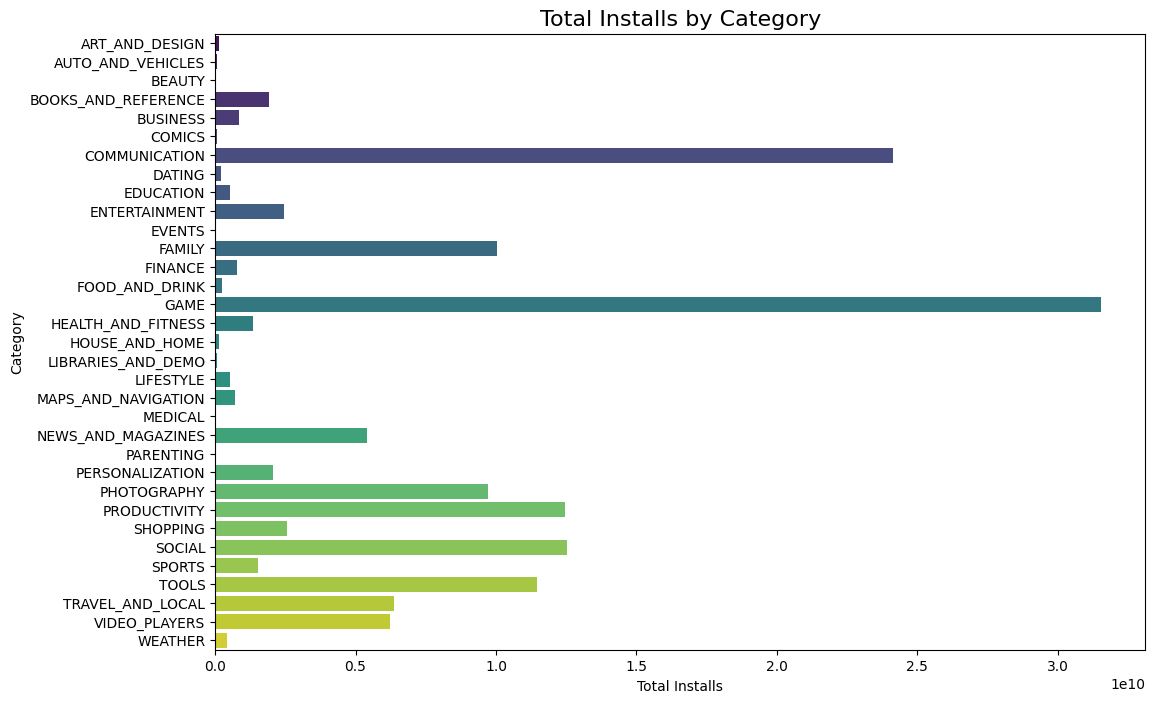

In [17]:
plt.figure(figsize=(12, 8))
# Usamos el nombre correcto de la columna: Installs_Clean
category_installs = df.groupby('Category', observed=True)['Installs_Clean'].sum().sort_values(ascending=False)
sns.barplot(x=category_installs.values, y=category_installs.index, palette="viridis")
plt.title("Total Installs by Category", fontsize=16)
plt.xlabel("Total Installs")
plt.ylabel("Category")
plt.show()

From this graph, we can determine that __Games__ are the most downloaded Category in the Play Store

### Free or Paid App?

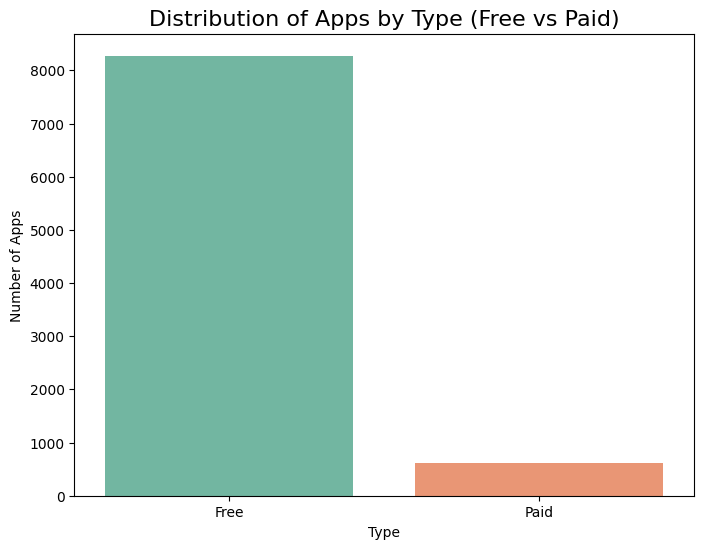

In [18]:
plt.figure(figsize=(8, 6))
# Cambiamos 'df' por 'data' en sns.countplot
sns.countplot(data=df, x='Type', palette="Set2")
plt.title("Distribution of Apps by Type (Free vs Paid)", fontsize=16)
plt.xlabel("Type")
plt.ylabel("Number of Apps")
plt.show()

Taking into account that almost __90%__ of the games are __Free__, now let's study if a Free game makes it a Top Tier Game

#### Visualizing this Data

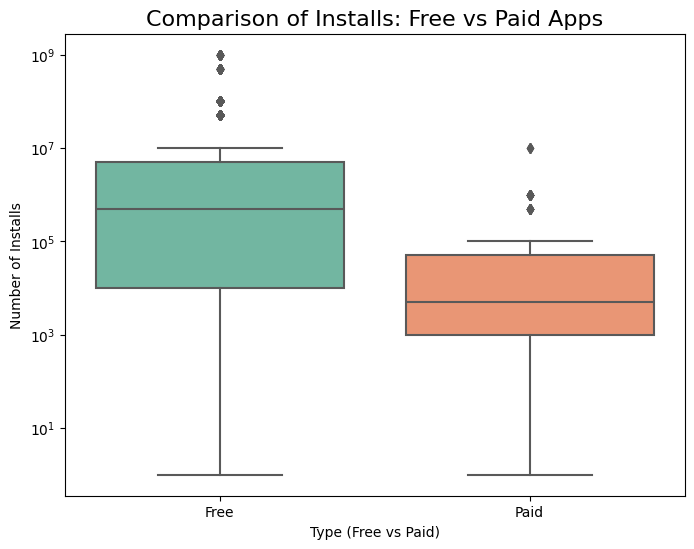

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Type', y='Installs_Clean', palette="Set2")
plt.title("Comparison of Installs: Free vs Paid Apps", fontsize=16)
plt.xlabel("Type (Free vs Paid)")
plt.ylabel("Number of Installs")
plt.yscale('log')  # Escala logarítmica para capturar mejor la diferencia en instalaciones
plt.show()

We can clearly see that a __Free__ game is a better option to make it a Top Tier in comparison with Paid games.
So, one of the factors to make a Top Tier game is that the game should be Free